In [16]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np

from csbdeep.utils import normalize
from glob import glob
from skimage import io
from stardist.matching import matching_dataset
from stardist.models import StarDist2D
from tqdm import tqdm

from utils import save_scores_csv, show_test_images, taus

In [8]:
image_dir = '../images'
merfish_dir = f'{image_dir}/u2os'

model_dir = './models'

In [9]:
# 8 images (20%) chosen for test
merfish_X_test_names = sorted(glob(f'{merfish_dir}/test/images/*.tif'))
merfish_X_test = [normalize(img, 1, 99.8, axis=(0, 1)) for img in list(map(io.imread, merfish_X_test_names))]
merfish_Y_test_names = sorted(glob(f'{merfish_dir}/test/masks/*.tif'))
merfish_Y_test = list(map(io.imread, merfish_Y_test_names))

# Flip/Rotation Augmenter

In [10]:
# Load from disk
fliprot_aug_merfish_model = StarDist2D(None, name='fliprot_aug_merfish_model', basedir=model_dir) 

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.458044, nms_thresh=0.3.


In [11]:
merfish_Y_pred = [fliprot_aug_merfish_model.predict_instances(x, n_tiles=fliprot_aug_merfish_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(merfish_X_test)]

100%|██████████| 8/8 [03:18<00:00, 24.80s/it]


In [12]:
merfish_Y_pred_labels = [pred[0] for pred in merfish_Y_pred]
merfish_stats = [matching_dataset(merfish_Y_test, merfish_Y_pred_labels, thresh=t, show_progress=False) for t in tqdm(taus)]

100%|██████████| 9/9 [00:21<00:00,  2.44s/it]


In [13]:
merfish_stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=0, tp=41, fn=2, precision=1.0, recall=0.9534883720930233, accuracy=0.9534883720930233, f1=0.9761904761904762, n_true=43, n_pred=41, mean_true_score=0.7638530299707659, mean_matched_score=0.801114153383974, panoptic_quality=0.7820400068748318, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=0, tp=41, fn=2, precision=1.0, recall=0.9534883720930233, accuracy=0.9534883720930233, f1=0.9761904761904762, n_true=43, n_pred=41, mean_true_score=0.7638530299707659, mean_matched_score=0.801114153383974, panoptic_quality=0.7820400068748318, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=0, tp=41, fn=2, precision=1.0, recall=0.9534883720930233, accuracy=0.9534883720930233, f1=0.9761904761904762, n_true=43, n_pred=41, mean_true_score=0.7638530299707659, mean_matched_score=0.801114153383974, panoptic_quality=0.7820400068748318, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.4, fp=0, tp=41, fn=2, precisio

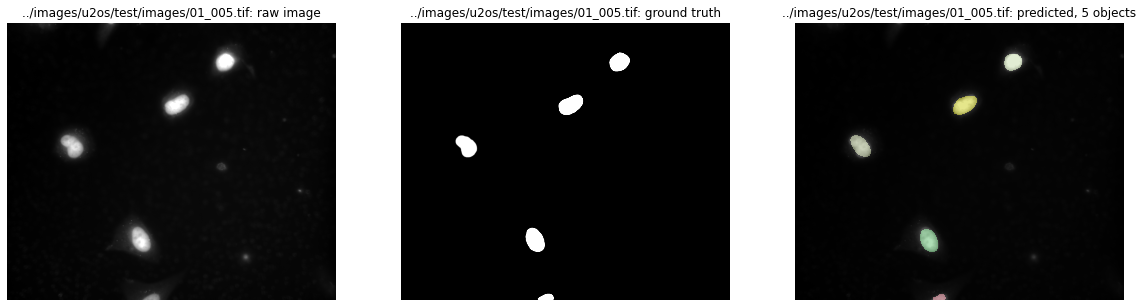

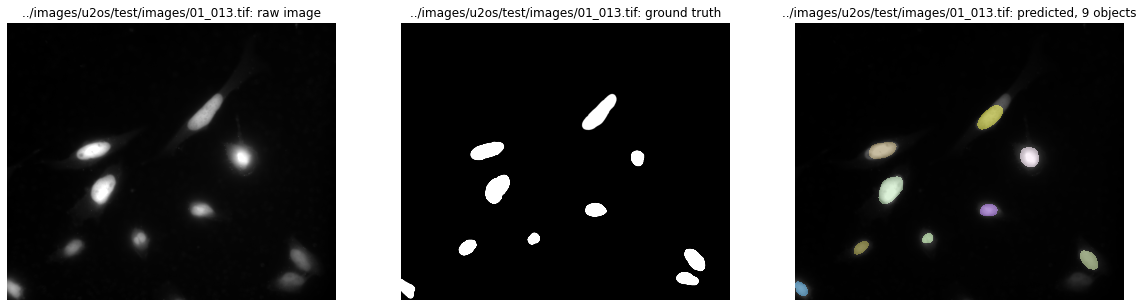

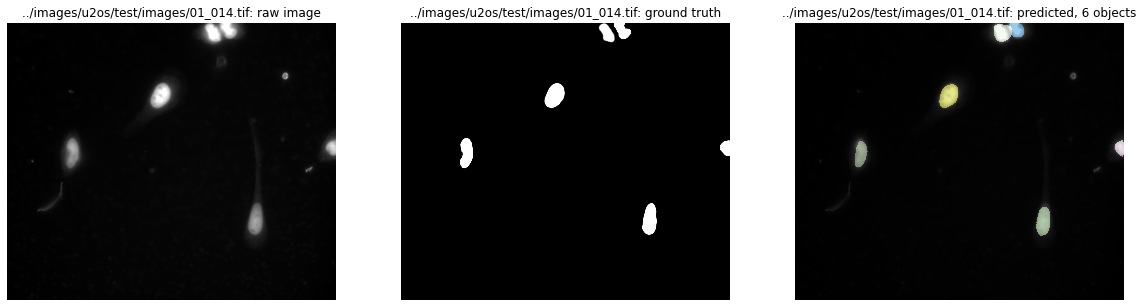

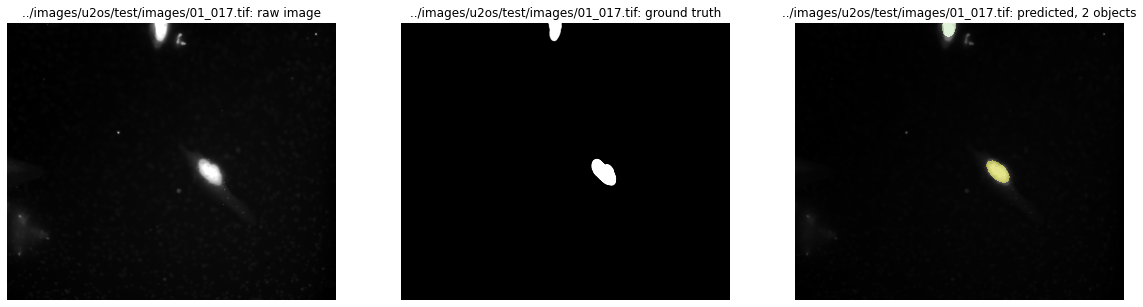

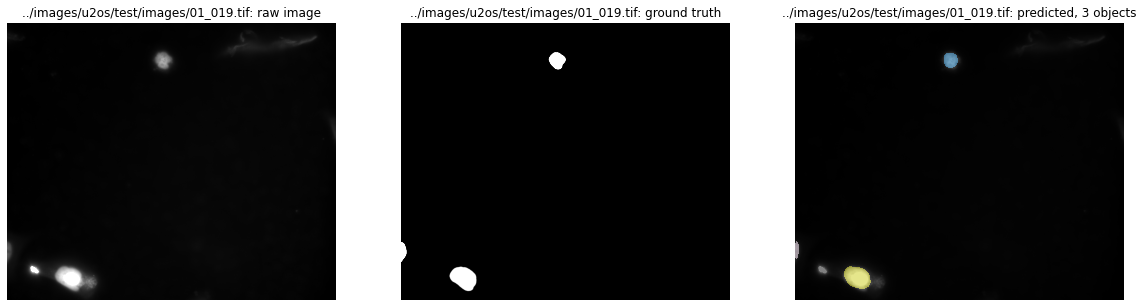

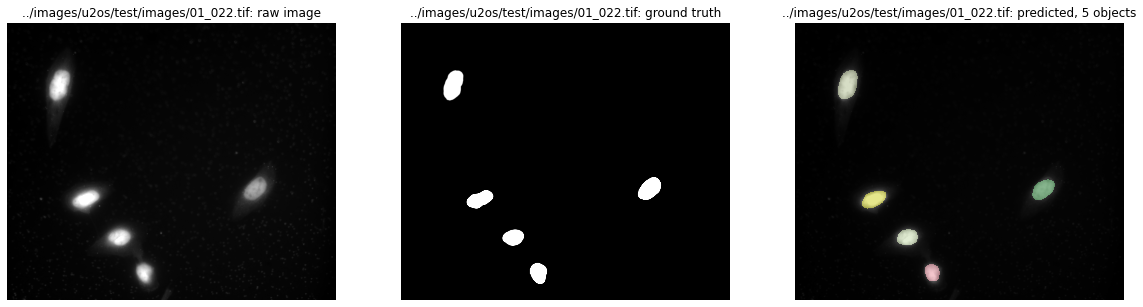

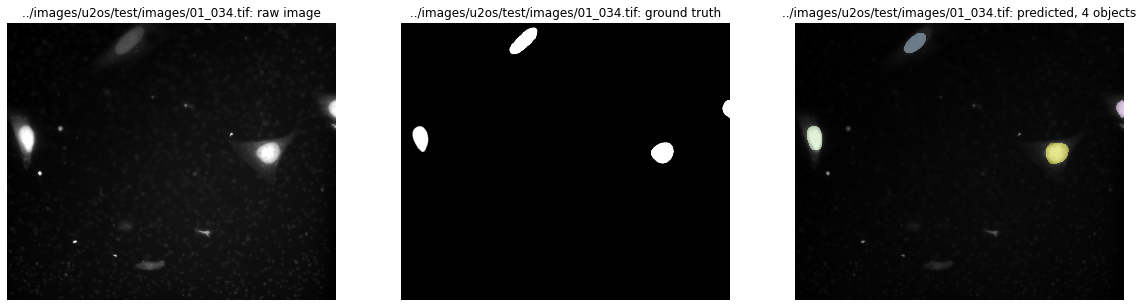

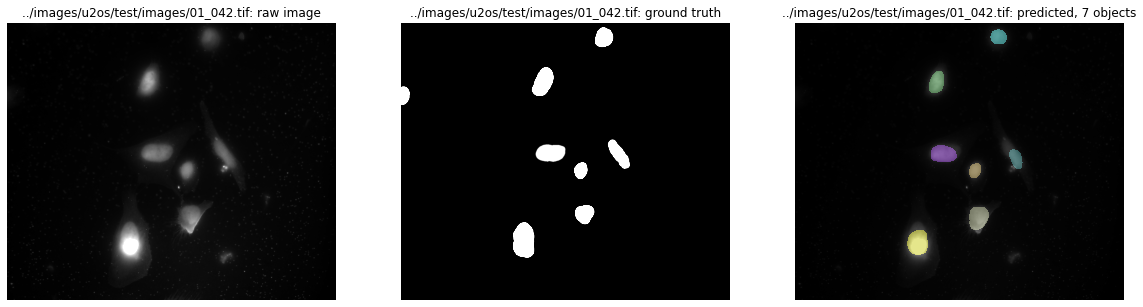

In [14]:
show_test_images(merfish_X_test, merfish_Y_test, merfish_Y_pred, merfish_X_test_names)

In [17]:
save_scores_csv(merfish_stats, '_fliprot')

# Intensity Augmenter

In [18]:
# Load from disk
intensity_aug_merfish_model = StarDist2D(None, name='intensity_aug_merfish_model', basedir=model_dir) 

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.543226, nms_thresh=0.3.


In [19]:
merfish_Y_pred = [intensity_aug_merfish_model.predict_instances(x, n_tiles=intensity_aug_merfish_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(merfish_X_test)]

100%|██████████| 8/8 [02:53<00:00, 21.70s/it]


In [20]:
merfish_Y_pred_labels = [pred[0] for pred in merfish_Y_pred]
merfish_stats = [matching_dataset(merfish_Y_test, merfish_Y_pred_labels, thresh=t, show_progress=False) for t in tqdm(taus)]

100%|██████████| 9/9 [00:16<00:00,  1.79s/it]


In [21]:
merfish_stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=0, tp=30, fn=13, precision=1.0, recall=0.6976744186046512, accuracy=0.6976744186046512, f1=0.821917808219178, n_true=43, n_pred=30, mean_true_score=0.5521881520945124, mean_matched_score=0.7914696846688012, panoptic_quality=0.6505230284949051, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=0, tp=30, fn=13, precision=1.0, recall=0.6976744186046512, accuracy=0.6976744186046512, f1=0.821917808219178, n_true=43, n_pred=30, mean_true_score=0.5521881520945124, mean_matched_score=0.7914696846688012, panoptic_quality=0.6505230284949051, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=0, tp=30, fn=13, precision=1.0, recall=0.6976744186046512, accuracy=0.6976744186046512, f1=0.821917808219178, n_true=43, n_pred=30, mean_true_score=0.5521881520945124, mean_matched_score=0.7914696846688012, panoptic_quality=0.6505230284949051, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.4, fp=1, tp=29, fn=14, prec

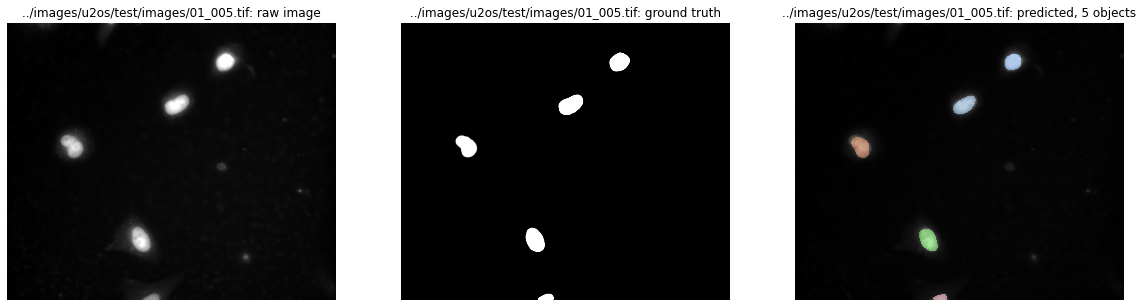

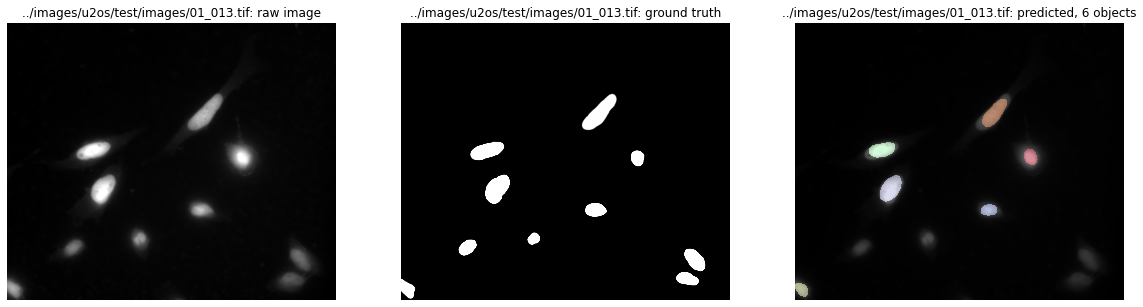

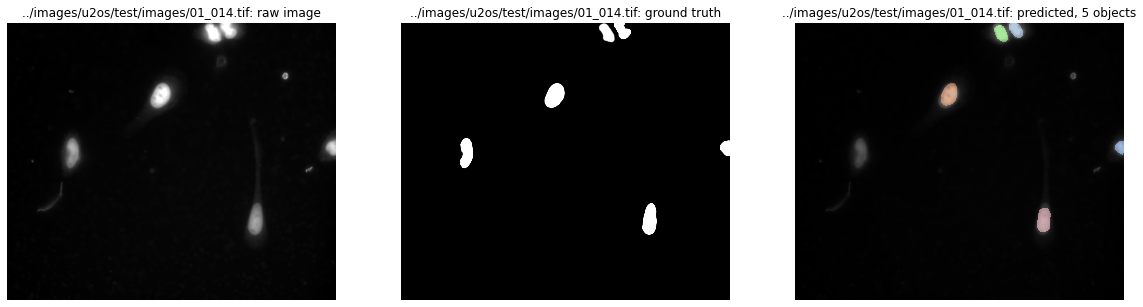

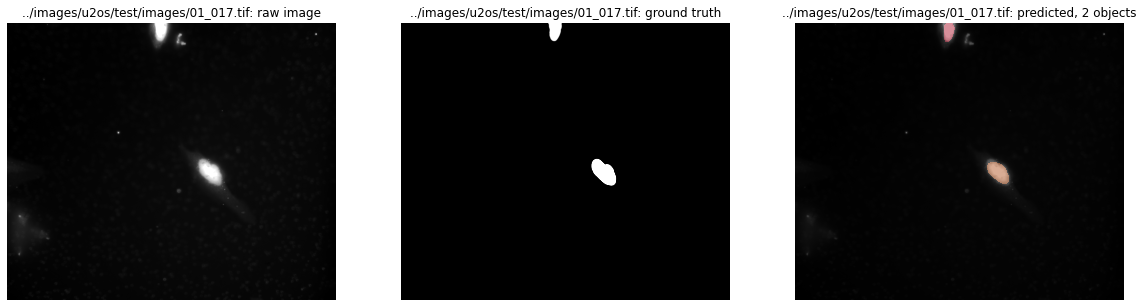

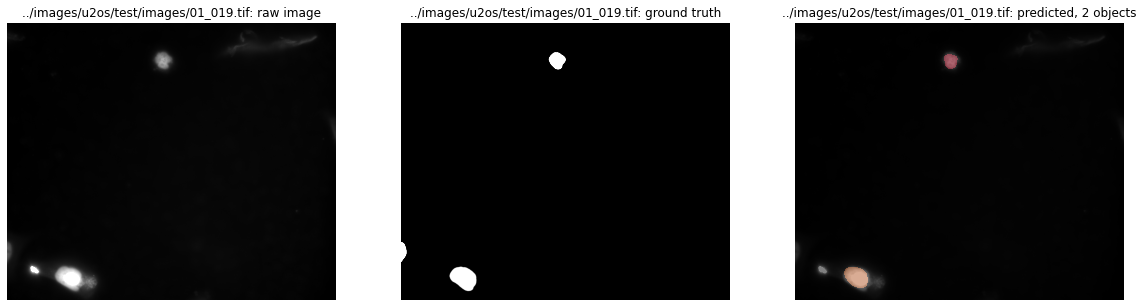

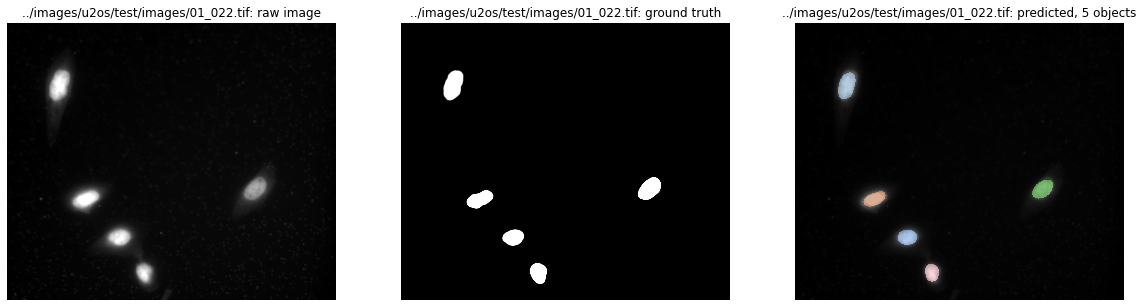

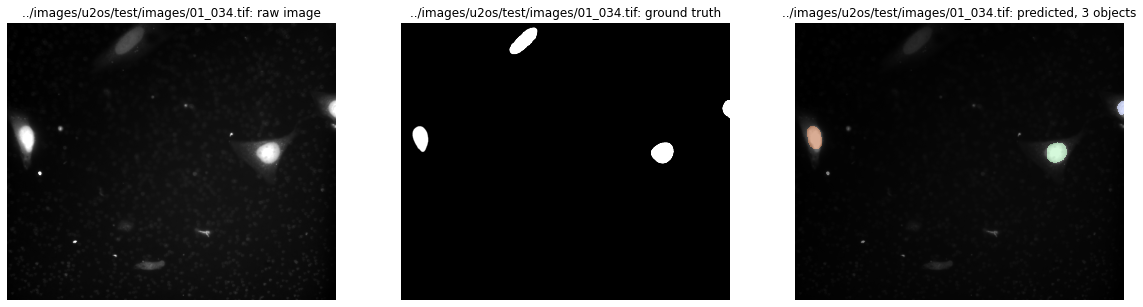

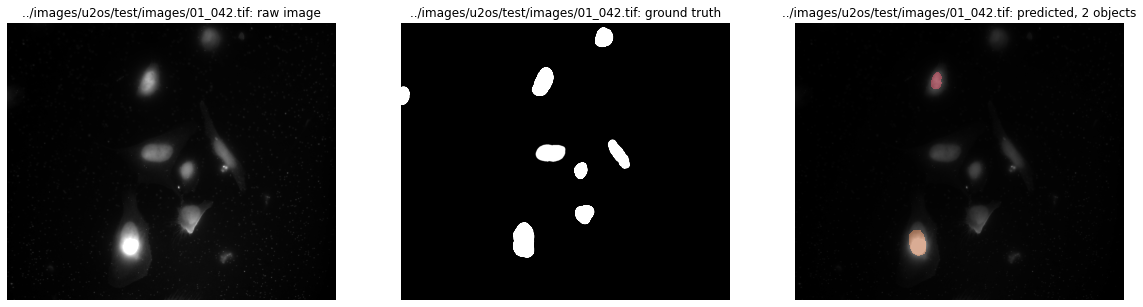

In [22]:
show_test_images(merfish_X_test, merfish_Y_test, merfish_Y_pred, merfish_X_test_names)

In [23]:
save_scores_csv(merfish_stats, '_intensity')

# Noise Augmenter

In [24]:
# Load from disk
noise_aug_merfish_model = StarDist2D(None, name='noise_aug_merfish_model', basedir=model_dir) 

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.663211, nms_thresh=0.3.


In [25]:
merfish_Y_pred = [noise_aug_merfish_model.predict_instances(x, n_tiles=noise_aug_merfish_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(merfish_X_test)]

100%|██████████| 8/8 [02:18<00:00, 17.35s/it]


In [26]:
merfish_Y_pred_labels = [pred[0] for pred in merfish_Y_pred]
merfish_stats = [matching_dataset(merfish_Y_test, merfish_Y_pred_labels, thresh=t, show_progress=False) for t in tqdm(taus)]

100%|██████████| 9/9 [00:19<00:00,  2.17s/it]


In [27]:
merfish_stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=0, tp=40, fn=3, precision=1.0, recall=0.9302325581395349, accuracy=0.9302325581395349, f1=0.963855421686747, n_true=43, n_pred=40, mean_true_score=0.7681641878893939, mean_matched_score=0.8257765019810984, panoptic_quality=0.7959291585359984, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=0, tp=40, fn=3, precision=1.0, recall=0.9302325581395349, accuracy=0.9302325581395349, f1=0.963855421686747, n_true=43, n_pred=40, mean_true_score=0.7681641878893939, mean_matched_score=0.8257765019810984, panoptic_quality=0.7959291585359984, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=0, tp=40, fn=3, precision=1.0, recall=0.9302325581395349, accuracy=0.9302325581395349, f1=0.963855421686747, n_true=43, n_pred=40, mean_true_score=0.7681641878893939, mean_matched_score=0.8257765019810984, panoptic_quality=0.7959291585359984, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.4, fp=0, tp=40, fn=3, precisio

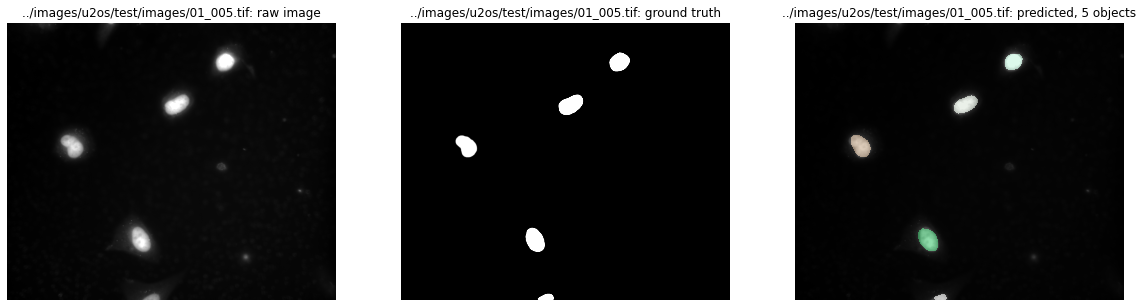

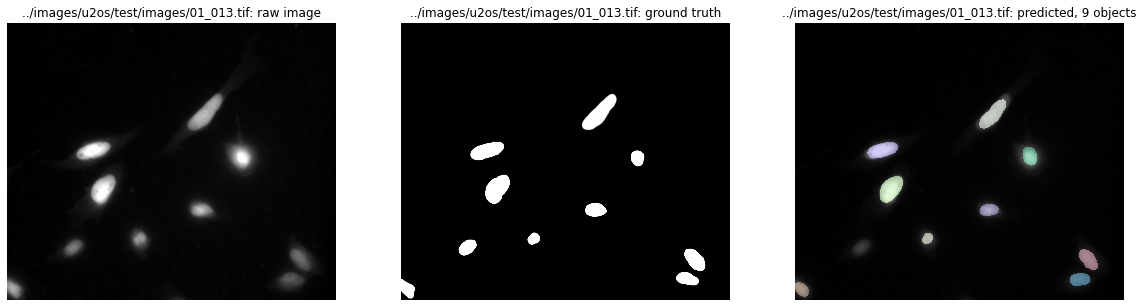

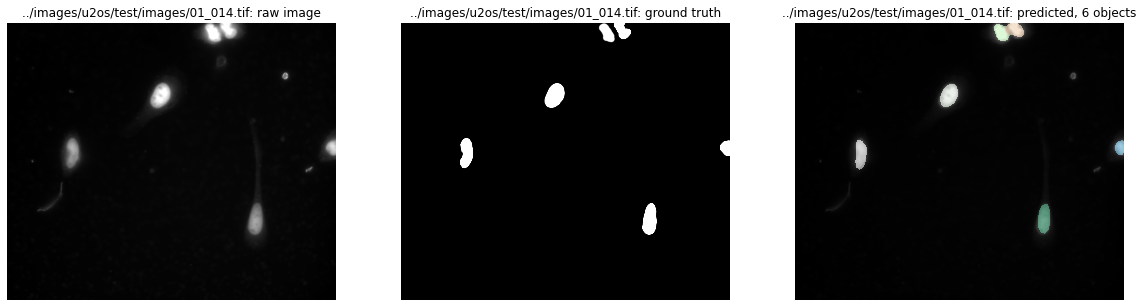

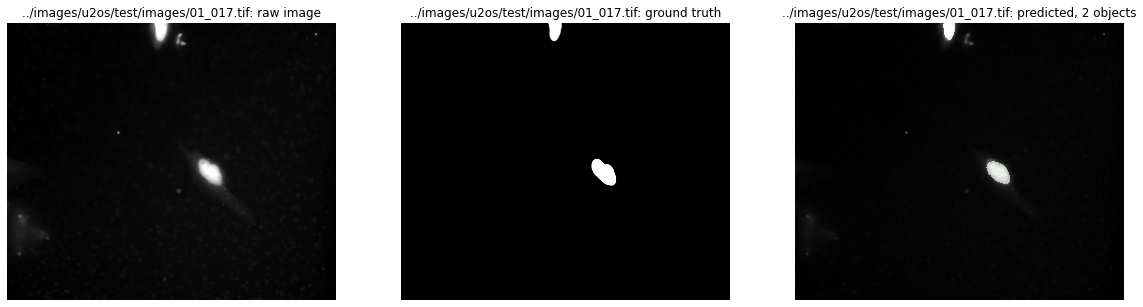

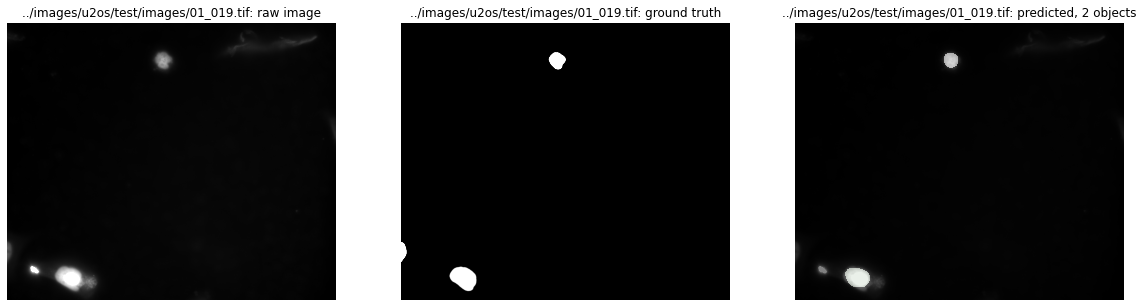

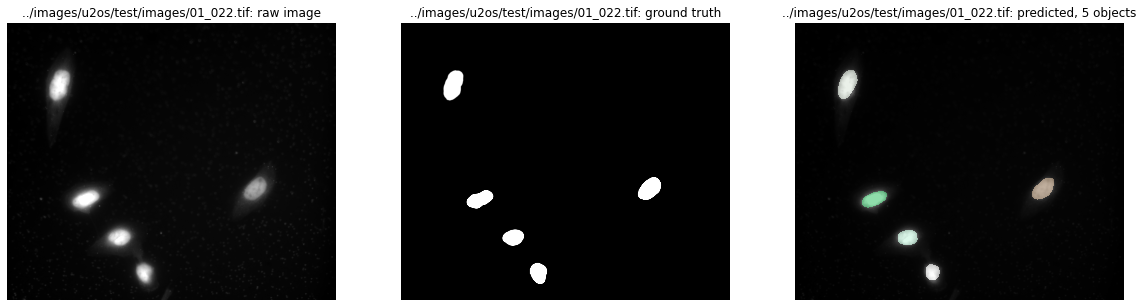

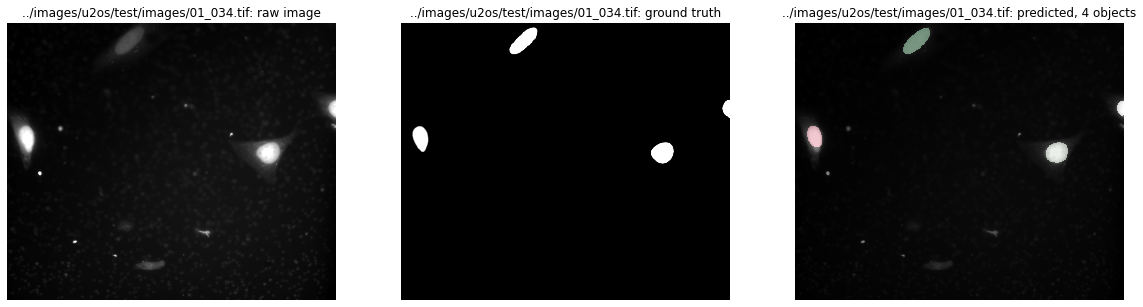

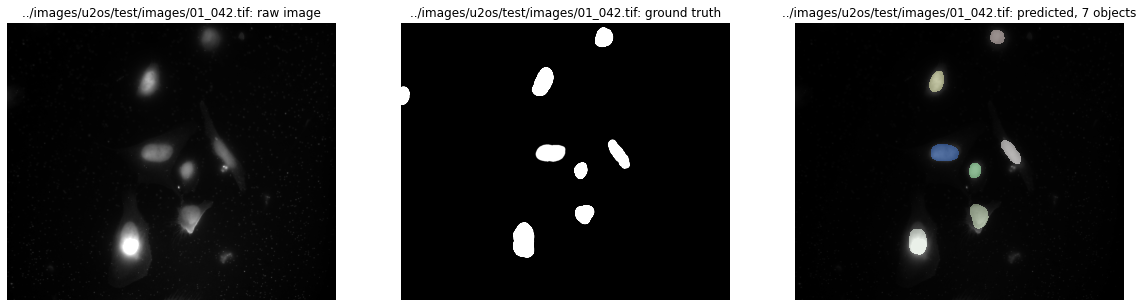

In [28]:
show_test_images(merfish_X_test, merfish_Y_test, merfish_Y_pred, merfish_X_test_names)

In [29]:
save_scores_csv(merfish_stats, '_noise')